In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import metrics

import statsmodels.api as sm

from math import sqrt

In [8]:
red_wine_df = pd.read_csv('./winequality-red.csv')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
red_wine_df.info()
# shows that there are no empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


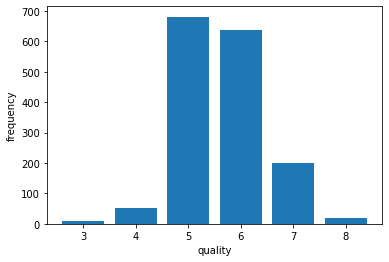

In [11]:
quality_dist = red_wine_df['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

# Multiple Linear Regression - First Approach

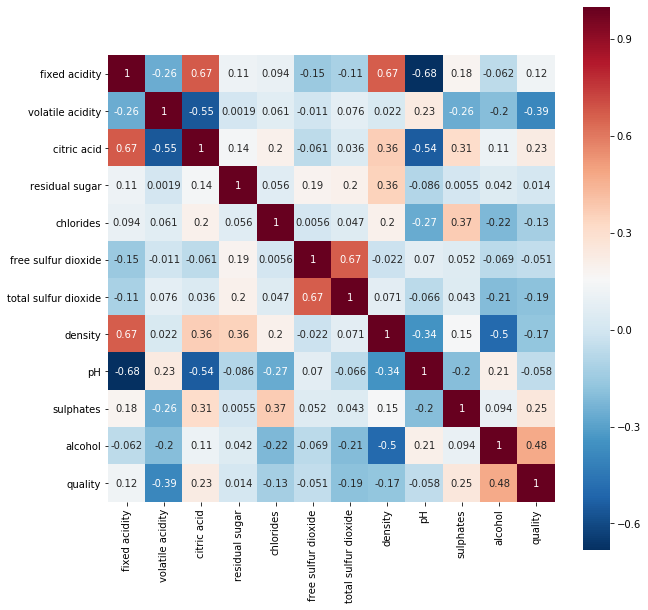

In [32]:
# check for highly correlated independent variables
correlations = red_wine_df.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlations,cmap='RdBu_r',annot=True,square=True)

In [33]:
# from above heatmap, we can see that 
#     fixed acidity, density, citric acid, free and total sulfur dioxide
# are highly correlated, so we drop those features from the dataset
red_wine_linear = red_wine_df.drop(['fixed acidity','density','citric acid','free sulfur dioxide','total sulfur dioxide'],axis = 1,inplace=False)

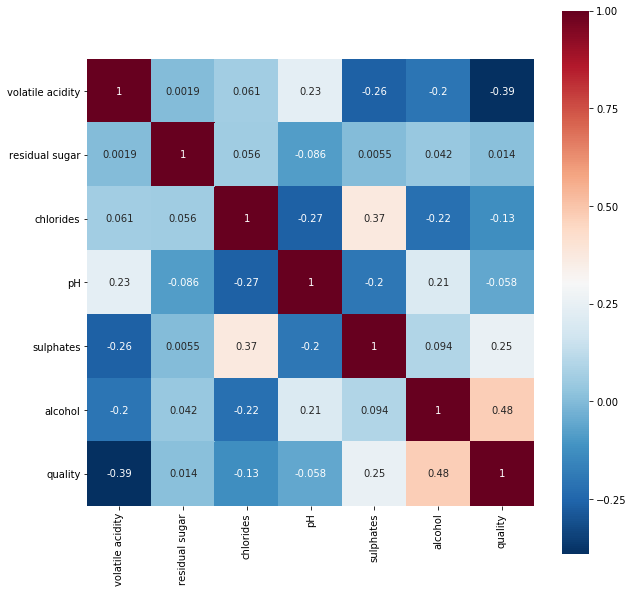

In [34]:
corr = red_wine_linear.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='RdBu_r',annot=True,square=True)

In [35]:
# the above heatmap with correlated features dropped looks a lot better
# we can now get the X and y sets
red_X = red_wine_linear.loc[:,'volatile acidity':'alcohol'].values
red_y = red_wine_linear.loc[:,'quality'].values

In [36]:
red_X_ols = red_X[:,0:6]
regressor_OLS = sm.OLS(exog=red_X_ols,endog=red_y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.879e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):                        0.00
Time:                        17:18:40   Log-Likelihood:                         -1633.3
No. Observations:                1599   AIC:                                      3279.
Df Residuals:                    1593   BIC:                                      3311.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0885      0.104    -10.464      0.000      -1.293      -0.884
x2             0.0123      0.012      1.034      0.301      -0.011       0.036
x3            -0.8770      0.399     -2.197      0.028      -1.660      -0.094
x4             0.6015      0.060     10.025      0.000       0.484       0.719
x5             1.0467      0.112      9.343      0.000       0.827       1.266
x6             0.3424      0.017     20.415      0.000       0.310       0.375
==============================================================================
Omnibus:                       35.637   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.760
Skew:                          -0.193   Prob(JB):                     2.87e-13
Kurtosis:                       3.848   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# we see x2 has a p-value of 0.301... way over our significance level of 0.05, so we eliminate this variable
red_X_ols = red_X[:,[0,2,3,4,5]]
regressor_OLS = sm.OLS(exog=red_X_ols,endog=red_y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.255e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):                        0.00
Time:                        17:18:40   Log-Likelihood:                         -1633.8
No. Observations:                1599   AIC:                                      3278.
Df Residuals:                    1594   BIC:                                      3304.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0858      0.104    -10.441      0.000      -1.290      -0.882
x2            -0.8404      0.398     -2.114      0.035      -1.620      -0.061
x3             0.6037      0.060     10.068      0.000       0.486       0.721
x4             1.0456      0.112      9.334      0.000       0.826       1.265
x5             0.3443      0.017     20.656      0.000       0.312       0.377
==============================================================================
Omnibus:                       33.626   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.896
Skew:                          -0.184   Prob(JB):                     1.98e-12
Kurtosis:                       3.821   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# there are no variables with p-values above our significance level of 0.05 so we stop here
# the r^2 and adj r^2 are very close to 1 which means our model fits well

# split data into test and train sets
red_X_train,red_X_test,red_y_train,red_y_test = train_test_split(red_X_ols,red_y,test_size=0.2, random_state=42)

In [39]:
# conduct feature scaling
scaler_X = StandardScaler()
red_X_train = scaler_X.fit_transform(red_X_train)
red_X_test = scaler_X.transform(red_X_test)

# fit model to training set
regressor = LinearRegression()
regressor.fit(red_X_train, red_y_train)

# predict test set
red_y_pred = regressor.predict(red_X_test)

In [40]:
# calculate RMSE to see how well the model predicts
rmse = sqrt(mean_squared_error(red_y_test, red_y_pred))
rmse

0.6258018596272735

In [41]:
# plt.scatter(red_X_test[:,4], red_y_test,  color='black')
# plt.scatter(red_X_test[:,4], red_y_pred, color='blue')
# plt.plot(red_X_test[:,4], red_y_pred, color='red', linewidth=0.5)

# RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

red_rfc_X = red_wine_df.loc[:,'volatile acidity':'alcohol'].values
red_rfc_y = red_wine_df.loc[:,'quality'].values

red_rfc_X_train, red_rfc_X_test, red_rfc_y_train, red_rfc_y_test = train_test_split(red_rfc_X, red_rfc_y, test_size=0.2, random_state=42)

In [43]:
scaler_X = StandardScaler()
red_rfc_X_train = scaler_X.fit_transform(red_rfc_X_train)
red_rfc_X_test = scaler_X.transform(red_rfc_X_test)

In [44]:
rfc = RandomForestClassifier(n_estimators=250, criterion='gini', random_state=1, max_features=3, max_depth=25)
rfc.fit(red_rfc_X_train, red_rfc_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [45]:
red_rfc_y_pred = rfc.predict(red_rfc_X_test)

In [46]:
# plt.scatter(x=red_rfc_X_test[:,2],y=red_rfc_y_test)
# plt.scatter(x=red_rfc_X_test[:,2],y=red_rfc_y_pred)
# plt.show()

print('Accurate predictions for Test set:', np.sum(red_rfc_y_test == red_rfc_y_pred))
print('Test total:', len(red_rfc_y_pred))
print('Test Accuracy: ' + str(metrics.accuracy_score(red_rfc_y_test, red_rfc_y_pred) * 100) + '%')
print()
red_rfc_y_train_pred = rfc.predict(red_rfc_X_train)
print('Accurate predictions for Train set:', np.sum(red_rfc_y_train == red_rfc_y_train_pred))
print('Train total:', len(red_rfc_y_train_pred))
print('Train Accuracy: ' + str(metrics.accuracy_score(red_rfc_y_train, red_rfc_y_train_pred) * 100) + '%')

Accurate predictions for Test set: 221
Test total: 320
Test Accuracy: 69.0625%

Accurate predictions for Train set: 1279
Train total: 1279
Train Accuracy: 100.0%


#### Ideally the accuracy for the train set should be lower because that would genereally yeild a better test set accuracy

In [47]:
print(set(red_rfc_y_test))
cm = confusion_matrix(red_rfc_y_test, red_rfc_y_pred)
print(cm)
print('\n')
print(classification_report(red_rfc_y_test, red_rfc_y_pred))

{3, 4, 5, 6, 7, 8}
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 101  28   1   0]
 [  0   0  26  99   7   0]
 [  0   0   0  20  21   1]
 [  0   0   0   0   5   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.75      0.78      0.77       130
           6       0.66      0.75      0.70       132
           7       0.62      0.50      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.66      0.69      0.67       320



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
# K Nearest Neighbors Classifier





#### Visual map of how the random forest classifer decides

In [306]:
# from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '+', '*', '.', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'black', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')


red_X_set, red_y_set = red_rfc_X_train, red_rfc_y_train
stacked_red_X_set = np.vstack((red_rfc_X_train, red_rfc_X_test))
stacked_red_y_set = np.hstack((red_rfc_y_train, red_rfc_y_test))
plot_decision_regions(stacked_red_X_set, stacked_red_y_set, classifier=rfc)
plt.title('Test')
plt.show()

# X1, X2 = np.meshgrid(np.arrange(start = red_X_set[:,0].min() - 1, stop=red_X_set[:,0].max() + 1))


ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 2 

In [200]:
# random_forest_classifer_list = [None] * 10
# red_rfc_y_pred_list = [None] * 10
# accuracy_list = [None] * 10
# accuracy_list_of_dicts = [None] * 10

# random_forest_classifer_list = []
# red_rfc_y_pred_list = []
# accuracy_list = []
# accuracy_list_of_dicts = []

# for i in range(0,110,10):
    
#     if i == 0:
#         continue
    
#     # create classifier
#     random_forest_classifer_list.append(RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=42))


# for i in range(0,10):
#     random_forest_classifer_list[i].fit(red_rfc_X_train, red_rfc_y_train)
    
#     # predict
#     red_rfc_y_pred_list.append(rfc.predict(red_rfc_X_test))

# print('done with predictions')
# for i in range(0,10):
    
#     # get accuracies
#     accuracy_list.append((np.sum(red_rfc_y_test == red_rfc_y_pred_list[i])) / len(red_rfc_y_pred))
#     accuracy_list_of_dicts.append({ i : (np.sum(red_rfc_y_test == red_rfc_y_pred_list[i])) / len(red_rfc_y_pred) })

# plt.plot(accuracy_list)
# plt.show()

# print(accuracy_list_of_dicts)